# Airline Passenger Satisfaction

What factors lead to customer satisfaction for an Airline?


## Appendex
- Cick on the links:
    >1.  <a href=#imports>Imports</a>
    >2.  <a href=#loaddata>Load Data</a>
    >3.  <a href=#dataformating>Data Formating & Feature Engineering</a>
    >4.  <a href=#Expl>Create X and y</a>
    >5.  <a href=#Ques> Dummy variables and label encoder </a>
    >6.  <a href=#d> Split the data</a>
    >7.  <a href=#b> Baseline Model </a>
    >8.  <a herf=#ss>Standerd Scale with grid search</a>
    >9.  <a herf=#ssss> Decision Tree & GridSearchCV Tune the parameters</a>
    >10. <a herf=#Rf>Random Forest with GridSearchCV Tune the parameters</a>
    >11. <a herf=#we>Soft voting </a>
    >12. <a herf=#sc>  Stacking Classifier </a>  
    >13. <a herf=#cm> Confution Matrix </a> 
    >14. <a herf=#jp>  XGboost</a>       

    

# Abstract

What factors lead to customer satisfaction for an Airline? This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

# Design

This project is one of the T5 Data Science Boot Camp requirements. Data provided by Kaggle. In this module we will be laying the foundation for our analysis by processing and exploring a large amount of data and classify it by using classification modules. The dataset contains an airline passenger satisfaction survey. 



# <a name='imports' > Import Libraries </a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()
# modeling imports
from sklearn.metrics import accuracy_score
import pickle
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, fbeta_score,f1_score ,confusion_matrix, classification_report, make_scorer
from mlxtend.classifier import StackingClassifier # <-- note: this is not from sklearn!
from sklearn import linear_model, neighbors, ensemble
import xgboost as xgb
sns.set_style("whitegrid")

In [2]:
def model_eval(mdl_local, X_local, y_local, bta = 1):
    y_pred = mdl_local.predict(X_local)
    print(f"F({bta}):", fbeta_score(y_local, y_pred, beta= bta))
    print("Precision :", precision_score(y_local, y_pred))
    print("Recall :", recall_score(y_local, y_pred))
    

def make_confusion_matrix(model, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_local)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_local, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Satisfied', 'Dissatisfied'],
           yticklabels=['Satisfied', 'Dissatisfied']);
    plt.xlabel('prediction')
    plt.ylabel('actual')


# <a name='loaddata' > Load Data </a>

In [3]:
df = pd.read_csv('Airline.csv')

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

# <a name='dataformating' > Data Formating & Features Engineering</a>

In [6]:
df.drop(['Gate location','Unnamed: 0', 'id'], axis= 'columns', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Food and drink                     25976 non-null  int64  
 10  Online boarding                    25976 non-null  int64  
 11  Seat comfort                       25976 non-null  int

In [8]:
df.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3281
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Food and drink                          6
Online boarding                         6
Seat comfort                            5
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         5
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            313
Arrival Delay in Minutes              320
satisfaction                            2
dtype: int64

In [9]:
df.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [10]:
sum(df.duplicated())

0

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# <a name='Expl' > Creat X and Y</a>

In [13]:
X = df.drop(['satisfaction'], axis = 1)
y = df['satisfaction']

<AxesSubplot:>

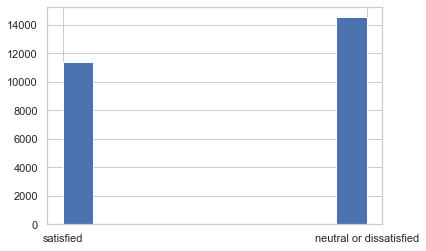

In [14]:
y.hist()

# <a name='Ques' > Dummy variables and label Encoder</a>

In [15]:
le = LabelEncoder()
y=le.fit_transform(y)

In [16]:
X= pd.get_dummies(X)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                25893 non-null  int64  
 1   Flight Distance                    25893 non-null  int64  
 2   Inflight wifi service              25893 non-null  int64  
 3   Departure/Arrival time convenient  25893 non-null  int64  
 4   Ease of Online booking             25893 non-null  int64  
 5   Food and drink                     25893 non-null  int64  
 6   Online boarding                    25893 non-null  int64  
 7   Seat comfort                       25893 non-null  int64  
 8   Inflight entertainment             25893 non-null  int64  
 9   On-board service                   25893 non-null  int64  
 10  Leg room service                   25893 non-null  int64  
 11  Baggage handling                   25893 non-null  int

In [18]:
df.shape

(25893, 22)

# <a name='d' > Split the data </a>

In [19]:
#Split the data
X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)

# <a name='b' > Baseline Model  </a>

In [20]:
#Baseline for num cloumns
num_col =df.select_dtypes(include = np.number).columns.values.tolist()

In [21]:
X1 = df[num_col]
X1_train, X1_val, y_train, y_val = \
        train_test_split(X1, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X1_train, y_train)
print(lr.score(X1_train, y_train))
print(lr.score(X1_val, y_val))

model_eval(lr, X1_train, y_train, bta = 2)

0.7444240610215314
0.7555512647229194
F(2): 0.733498457393647
Precision : 0.6945073030240692
Recall : 0.74394006170119


In [22]:
#Dummy 
linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)
print( linear_model.score(X_train, y_train))
print(linear_model.score(X_val, y_val))
model_eval(linear_model, X_train, y_train, bta = 2)

0.812059476682437
0.8198493917744738
F(2): 0.7915193570346297
Precision : 0.7806172171088251
Recall : 0.7942926399294844


# Pickle approach

In [23]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(linear_model, file)

In [24]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression()

In [25]:

# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(X_val, y_val)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_val)  

Ypredict

Test score: 81.98 %


array([1, 0, 1, ..., 0, 0, 0])

# <a name='ss' > Standerd Scale with the Grid search </a>

In [26]:
std_scale= StandardScaler()
std_scale.fit(X_train)
Xtrain_scale = std_scale.transform(X_train)
Xval_scale = std_scale.transform(X_val)

linear_model.fit(Xtrain_scale, y_train)
print(linear_model.score(Xtrain_scale, y_train))
print(linear_model.score(Xval_scale ,y_val))
model_eval(linear_model, Xtrain_scale, y_train, bta = 2)

0.8709085642560587
0.8710175709596447
F(2): 0.8392944417292398
Precision : 0.8675086107921929
Recall : 0.8325253415601587


# <a name='' > KNN Grid search </a>

In [27]:
# Grid search 
# define the parameter values that should be searched
k_range = list(range(1, 100))
print(k_range)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

# instantiate the grid
knn = KNeighborsClassifier(n_neighbors=5)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [28]:
# fit the grid with data
grid.fit(X, y);
# view the complete results
grid.cv_results_

{'mean_fit_time': array([0.01261997, 0.00911484, 0.00937998, 0.00468819, 0.00312622,
        0.00625157, 0.00534282, 0.00781279, 0.01097245, 0.00526557,
        0.00343778, 0.00528829, 0.00781376, 0.01009624, 0.00468748,
        0.00625572, 0.00312531, 0.01113348, 0.00492423, 0.00924227,
        0.00855081, 0.00937574, 0.00491347, 0.00891569, 0.00496073,
        0.0046859 , 0.00472374, 0.01012442, 0.00770588, 0.00468707,
        0.00781162, 0.00962534, 0.00500669, 0.01011136, 0.00770605,
        0.00805306, 0.00960553, 0.01024749, 0.00156233, 0.0056237 ,
        0.00784633, 0.00468793, 0.01113784, 0.00338516, 0.0062495 ,
        0.00312538, 0.00781336, 0.00312438, 0.00332432, 0.00974388,
        0.00937591, 0.0049166 , 0.00312574, 0.00937402, 0.00624897,
        0.00383637, 0.00493858, 0.00837407, 0.0062484 , 0.00625021,
        0.00624909, 0.00835495, 0.00156217, 0.00472636, 0.00961339,
        0.00472693, 0.00312479, 0.00960031, 0.00492306, 0.00781245,
        0.00781121, 0.00781085,

# Examine the best model

In [29]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 7}
Best estimator:  KNeighborsClassifier(n_neighbors=7)
Best score:  0.7079519976854856


In [30]:
knn_best = grid.best_estimator_

# <a name='ssss' > Decision Tree &  GridSearchCV Tune the parameters  </a>

In [31]:

decisiontree = DecisionTreeClassifier()
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
decisiontree.fit(xtrain, ytrain)
print(decisiontree.score(xtrain, ytrain))
print(decisiontree.score(xtest, ytest))


1.0
0.9348609680741503


In [32]:
# Save the Modle to file in the current working directory

Pk2_Filename = "Pickle_RL_Model.pk2"  

with open(Pk2_Filename, 'wb') as file:  
    pickle.dump(decisiontree, file)

In [33]:
# Load the Model back from file
with open(Pk2_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

DecisionTreeClassifier()

In [34]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(X_val, y_val)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_val)  

Ypredict

Test score: 98.17 %


array([1, 0, 1, ..., 0, 0, 0])

In [35]:
# GridSearchCV Tune the parameters 

params_dict = {
    'max_depth' : [3, 5, 7, 8, 11, 12],
    'min_samples_split' : [2, 3, 5, 9],
    'criterion' : ['gini', 'entropy']
}

grid = GridSearchCV(decisiontree, 
                   param_grid= params_dict,
                   cv = 10, 
                   verbose=1,
                   n_jobs=-1)
grid.fit(xtrain, ytrain)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, 11, 12],
                         'min_samples_split': [2, 3, 5, 9]},
             verbose=1)

In [36]:
# Save the model to disk

In [37]:
#DS_T = 'decisiontree.sav'

In [38]:
#pickle.dump(decisiontree,open('DS_T','wb'))

In [39]:
#loaded_model=pickle.load(open(Tree ,'rb'))
#result=loaded_model.score(xtest,ytest)
#print(result)

In [40]:
grid.cv_results_

{'mean_fit_time': array([0.06717246, 0.06873288, 0.0718586 , 0.06873362, 0.10153921,
        0.09652619, 0.0952539 , 0.09997723, 0.11844373, 0.12052844,
        0.1183315 , 0.12012687, 0.12965696, 0.13121886, 0.12965736,
        0.12965708, 0.15777547, 0.15749576, 0.15731692, 0.15933986,
        0.16402335, 0.16606295, 0.16273375, 0.16351256, 0.06663966,
        0.0670845 , 0.06656122, 0.07250783, 0.10498457, 0.09898164,
        0.10015137, 0.10073471, 0.11872218, 0.12191482, 0.12436104,
        0.1249718 , 0.13278151, 0.1328047 , 0.13049595, 0.13513618,
        0.15547101, 0.1525059 , 0.15456281, 0.15015152, 0.16089983,
        0.15621309, 0.15933778, 0.14695833]),
 'std_fit_time': array([0.0100018 , 0.00765286, 0.00765294, 0.00765255, 0.0078119 ,
        0.00644211, 0.00681606, 0.01036233, 0.00699183, 0.00681772,
        0.01033968, 0.006857  , 0.00715821, 0.00765351, 0.00715872,
        0.00715886, 0.00841265, 0.00848339, 0.00443742, 0.00937305,
        0.01047933, 0.00761472, 0.005

# Examine the best model

In [41]:

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 9}
Best estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=9)
Best score:  0.940082540981311


In [42]:
dt_best = grid.best_estimator_

# <a name='Rf' >Random Forest with GridSearchCV Tune the parameters</a>

In [43]:
randomforest = RandomForestClassifier(n_estimators=100)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
randomforest.fit(xtrain, ytrain)
print(randomforest.score(xtrain, ytrain))
print(randomforest.score(xtest, ytest))


1.0
0.9585478887744593


In [44]:
# Save the Modle to file in the current working directory

Pk3_Filename = "Pickle_RL_Model.pk3"  

with open(Pk3_Filename, 'wb') as file:  
    pickle.dump(randomforest, file)

In [45]:
# Load the Model back from file
with open(Pk3_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

RandomForestClassifier()

In [46]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(xtest, ytest)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(xtest)  

Ypredict

Test score: 95.85 %


array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
# GridSearchCV Tune the parameters
params_dict = {
    'n_estimators': [10, 20, 40, 50, 70],
    'max_depth' : [3, 5, 7, 8, 11, 12],
    'criterion' : ['gini',  'entropy' ],
    'min_samples_split' : [  2 ,  3,  5 ,  9 ],
    'max_features' : [ 'auto' ,  'sqrt' ,   'log2' ]
}

grid = GridSearchCV(randomforest, 
                   param_grid= params_dict,
                   cv = 10, 
                   verbose=1,
                   n_jobs=-1)
grid.fit(xtrain, ytrain)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [ ]:
grid.cv_results_

# Examine the best model

In [ ]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

In [ ]:
rf_best =grid.best_estimator_

# <a name='jp' > XGboost </a>

In [ ]:
#XGBoost 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_test,y_test)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb.plot_importance(gbm, importance_type='gain')

In [ ]:
model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_comb = 70

random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=10, verbose=3, random_state=42)

random_search.fit(X_train, y_train) 

In [ ]:
print('Best score:')
print(random_search.best_score_)

In [ ]:
print('Best estimator:')
print(random_search.best_estimator_)

In [ ]:
tuned_xgb = random_search.best_estimator_

In [ ]:
model_eval(tuned_xgb, X_train, y_train, bta = 1)

# <a name='we' > Soft voting</a>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [ ]:
model_eval(rf_best, X_train, y_train, bta = 2)

In [ ]:
lr_model = linear_model.LogisticRegression()
knn_model = neighbors.KNeighborsClassifier()
rf_model = ensemble.RandomForestClassifier()

In [ ]:
model_names = ["lr_model","knn_best","rf_best"]

In [ ]:
for model_name in model_names:
    curr_model = eval(model_name)
    curr_model.fit(X_train, y_train)
    print(f'{model_name} Train score: {curr_model.score(X_train, y_train)}')
    print(f'{model_name} Test score: {curr_model.score(X_test, y_test)}')
    print('------')

In [ ]:
model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [ ]:
model_list

# create voting classifier

In [ ]:

voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this soft voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

# <a name='sc' >Stacking Classifier </a>

In [ ]:

stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)

In [ ]:
stacked.fit(X_train, y_train)

In [ ]:
y_pred = stacked.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
y_pred1 = stacked.predict(X_train)
accuracy_score(y_train, y_pred1)

# <a name='' >ROC</a>

In [ ]:
#ROC 
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt  

fpr, tpr, thresholds = roc_curve(y_test, tuned_xgb.predict_proba(X_test)[:,1]) 

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, tuned_xgb.predict_proba(X_test)[:,1]))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

In [ ]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(15,15)) 
classifiers = [lr_model, dt_best, rf_best, knn_best, voting_classifer, tuned_xgb]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

# <a name='' >Stacking Classifier </a>

In [ ]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val,rf_best.predict_proba(X_val)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [ ]:
y_pred= rf_best.predict(X_val)

In [ ]:
 precision_score(y_pred,y_val)

In [ ]:
 recall_score(y_pred,y_val)

In [ ]:
f1_score(y_val, y_pred)

In [ ]:
precision_recall_curve(y_pred,y_val)

# <a name='cm' >Confution Matrix </a>

In [ ]:
from sklearn.metrics import confusion_matrix
print("Random Forest confusion matrix: \n\n", confusion_matrix(y_val,rf_best.predict(X_val)))

In [ ]:
make_confusion_matrix(dt_best, X_val, y_val, threshold=0.5)

In [ ]:
# Print confusion matrix for kNN
rf_confusion = confusion_matrix(y_test,rf_best.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt=".1f") 
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Random Forst confusion matrix');